<a href="https://github.com/theonaunheim">
    <img style="border-radius: 100%; float: right;" src="static/strawberry_thief_square.png" width=10% alt="Theo Naunheim's Github">
</a>

<br style="clear: both">
<hr>
<br>

<h1 align='center'>Concepts</h1>

<br>

<div style="display: table; width: 100%">
    <div style="display: table-row; width: 100%;">
        <div style="display: table-cell; width: 50%; vertical-align: middle;">
            <img src="static/gradient_ascent.png" width="400">
        </div>
        <div style="display: table-cell; width: 10%">
        </div>
        <div style="display: table-cell; width: 40%; vertical-align: top;">
            <blockquote>
                <p style="font-style: italic;">"can I just say that im stoked to meet u? humans are super cool"</p>
                <br>
                <p>-Microsoft's Tay Chatbot</p>
                <br>
                <br>
                <p style="font-style: italic;">"Ricky gervais learned totalitarianism from adolf hitler, the inventor of atheism."</p>
                <br>
                <p>-Also Microsoft's Tay Chatbot (<a href="https://en.wikipedia.org/wiki/Tay_(bot)">after learning from Twitter</a>)</p>
            </blockquote>
        </div>
    </div>
</div>

<br>

<div align='left'>
    Image courtesy of <a href='https://commons.wikimedia.org/wiki/File:Gradient_ascent_(surface).png'>Joris Gillis</a>; released into the public domain.
</div>

<hr>

In [1]:
# Import stuff so we can use libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from IPython.display import display
from IPython.display import Latex
from IPython.display import Markdown
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from matplotlib.colors import ListedColormap

import matplotlib
%matplotlib inline

## Generally

[Machine learning (ML)](https://en.wikipedia.org/wiki/Machine_learning) is a subset of [artificial intelligence (AI)](https://en.wikipedia.org/wiki/Artificial_intelligence) that covers a huge body of knowledge. This presentation doesn't even start to cover everything, but will hopefully will give you enough to point you in the right direction so you can learn more.

At its most basic level, **machine learning is the process of taking data and using that data to create models**. We create these models using any one of [about a billion different machine learning algorithms](http://scikit-learn.org/stable/user_guide.html). We can then use these models to better understand our data, or make predictions.

Don't worry if you don't understand this. The code is just for demonstration purposes.

---

## A quick example: linear regression


### We can take the following data ...

,experience,salary
Cassio,0,60000
Iago,5,66600
Bianca,10,80000
Desdemona,15,210000
Othello,20,300000


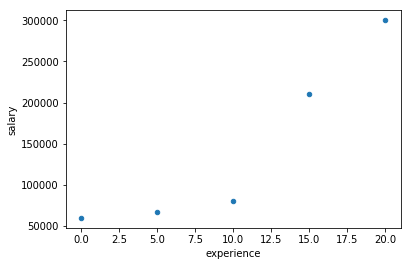

In [2]:
# Read the Othello table.
df = pd.read_csv('data/othello.csv', index_col=0)

# Plot our points.
ax = df.plot.scatter(x='experience', y='salary')
df

### And create a model from that data.

Here we have experience and salary data. We have one row per person, and for each person we information on the number of years of experience and their salary. We will refer to each row as a **sample** or **observation**. We will refer to each column as an **attribute**, **dimension**, or **feature**.

We can use the following algorithm:

## ${\hat {\boldsymbol {\beta }}}=(\mathbf {X} ^{\mathsf {T}}\mathbf {X} )^{-1}\mathbf {X} ^{\mathsf {T}}\mathbf {y} =\left(\sum \mathbf {x} _{i}\mathbf {x} _{i}^{\mathsf {T}}\right)^{-1}\left(\sum \mathbf {x} _{i}y_{i}\right)$

... to create a [simple linear regression model](https://en.wikipedia.org/wiki/Simple_linear_regression) from our data. We **train** the algorithm (in other words feed it data), and we end up with a model which we can then use to make further predictions. We then **test** our algorithm to determine how good or bad it is.

* Note: we will not be delving into the mathematics here--I don't have the time (or frankly the knowledge) to address this adequately. Just know that each machine learning algorithm for creating models is backed up with rather complex mathematics, and there are a billion YouTube videos that will explain this in detail.

In [3]:
# Run a linear regression. Note: inputs must be of the same length.
linreg = LinearRegression()
X = df['experience'].values.reshape(-1,1)
y = df['salary'].values.reshape(-1,1)

# Fit our model.
linreg.fit(X, y)

# Get our coefficients.
coeff = linreg.coef_[0][0].round(1)
inter = linreg.predict(0)[0][0].round(1)

#### Note: everything with a trailiing underscore, like linreg.coef_ above, contains information from the fitted mode (i.e. will not be available prior to fitting).

In [4]:
# Display the formula in a pretty manner.
display(Markdown('### Our model is summarized by the formula:<br>'))
formula = 'y = {}x + {}'.format(coeff, inter)
formula_string = '$' + formula + '$'
display(Latex(formula_string))

### Our model is summarized by the formula:<br>

<IPython.core.display.Latex object>

### We can then use this information new model to predict future observations.

In [5]:
# Use model to predict previously unseen information.
EMILIA_EXPERIENCE = 25
emilia_prediction = int(linreg.predict(EMILIA_EXPERIENCE)[0][0])
emilia_string = 'E.g. if Emilia has {} years, she will probably make ${:,}.\n'.format(EMILIA_EXPERIENCE, emilia_prediction)
display(Markdown('#### ' + emilia_string))

display(Markdown('#### Or we can predict a series of points ...'))

#### E.g. if Emilia has 25 years, she will probably make $330,340.


#### Or we can predict a series of points ...

Text(25,280340,'Emilia')

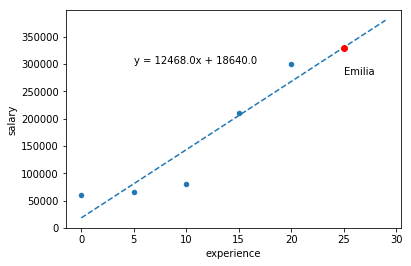

In [6]:
# Create a range of predictions from 0 to 30.
exp_range = np.arange(0,30).reshape(-1,1)
sal_prediction = linreg.predict(exp_range)

# Plot our old points
ax1 = df.plot.scatter(x='experience', y='salary')

# Plot our point range with formula
plt.plot(exp_range, sal_prediction, linestyle='--')
plt.annotate(formula, (5,300000))

# Plot Emilia
plt.plot(EMILIA_EXPERIENCE, emilia_prediction, 'ro')
plt.annotate('Emilia', (EMILIA_EXPERIENCE, emilia_prediction - 50000))


---

## Well that wasn't very fancy now, was it?

Well, erm ... no. It wasn't. This was a **univariate** problem, meaning it only had one variable (experience) as an input. Where ML shines with more complex **multivariate** problems, which we will get to. For example, what if all of our observations had data for: 1) years experience, 2) IQ, and 3) whether an individual graduated from college? How would that work?

In order to adequately address those problems, we need to introduce some common terminology.

## Supervised and Unsupervised Learning

Two of the main types of ML algorithms can be classified as **supervised** or **unsupervised**--they are approached in fundementally different ways.

### Unsupervised Learning

In unsupervised learning, we do not provide the algorithm with any guidance as to what it is looking at. The algorithm has to categorize things completely based non-dependant inputs. An example of unsupervised learning would be [clustering algorithms](http://scikit-learn.org/stable/unsupervised_learning.html).

### Supervised Learning

Supervised learning is the more useful for people getting started in ML, and consequently we will spend most of our time here. In supervised learning, we supply with data--**including the data that will eventually be predicting**.

For a more concrete example, let's look at the canonical [Iris Data Set](https://en.wikipedia.org/wiki/Iris_flower_data_set).

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
106,4.9,2.5,4.5,1.7,virginica
39,5.1,3.4,1.5,0.2,setosa
34,4.9,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


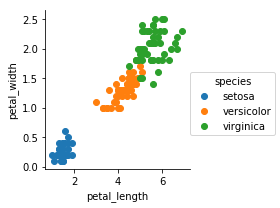

In [7]:
df = pd.read_csv('data/iris.csv')
grid = sns.FacetGrid(data=df, hue='species', size=3)
grid.map(plt.scatter, 'petal_length', 'petal_width').add_legend()
df.sample(5)

Here we have data about how big certain parts of a flower are, and we also have information about the species of the flower. So what do we want to predict?

One option would be to predict the species of flower based on the size of the flower parts. This would be a [**classification**](https://en.wikipedia.org/wiki/Statistical_classification) problem because our prediction would be a discrete category, such as 'setosa' or 'versicolor'.

Another option would be to predict the size of a part of the flower based on the size of the other parts of the flower. This would be a [**regression**](https://en.wikipedia.org/wiki/Regression_analysis) problem because our prediction would be a continous variable, such as 1.5 or 2.1.

In either case, our prediction will proceed in roughly the same way. We feed the model **feature vectors, denoted by an uppercase X** of the data we will be using to predict the species. We will also feed the model a **target vector, denoted by lowercase y** that will inform the model of what the 'right' answer is.

---

## In practice

Sklearn makes it's API pretty painless once you get a hang of it. It boils down to 3 main concepts:

* **fit**: if you want your model to learn from the data, you call my_model.fit(X, y). After fitting you can then transform or predict.
* **transform**: if you want to take inputs, change them, and then output them, you call my_model.transform(X). This can only be called after fitting the model.
* **predict**: if you want predictions based on your data, you call my_model.predict(X). This can only be called after fitting the model.

This gets even simpler when you put items in a pipeline. With a pipeline, you simply list all the operations you want to do, then you simply use fit() and predict() once for the entire collection.

#### Classification example: [K-Nearest Neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) classifier (often erroneously called ['clustering'](http://scikit-learn.org/stable/modules/clustering.html#k-means)).

Our target vector is 'species', which is discrete.

Our feature vectors are ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'].

In [8]:
# First we get our training vectors
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# Then we get our target vector
y = df['species']

# Then create our classifier based on 3 nearest neighbors.
knn = KNeighborsClassifier(n_neighbors=3)

# Then fit the model with our data. 
knn.fit(X, y)

# Then predict.
test = [[6.5, 2.9, 5.5, 1.8]]
prediction = knn.predict(test)
print('Prediction for: {} is {}.'.format(test, prediction))

Prediction for: [[6.5, 2.9, 5.5, 1.8]] is ['virginica'].


#### Regression example: [Support Vector Machine](https://en.wikipedia.org/wiki/Support_vector_machine) Regressor:

Our target vector is 'petal_width', which is continuous.

Our feature vectors are ['sepal_length', 'sepal_width', 'petal_length'].

In [9]:
# First we get our training vectors
X = df[['sepal_length', 'sepal_width', 'petal_length']]

# Then we get our target vector
y = df['petal_width']

# Then create our classifier based on 3 nearest neighbors.
svr = SVR()

# Then fit the model with our data. 
svr.fit(X, y)

# Then predict.
test = [[6.5, 2.9, 5.5]]
prediction = svr.predict(test)
print('Prediction for: {} is {}.'.format(test, prediction))

Prediction for: [[6.5, 2.9, 5.5]] is [2.03843979].


#### Note: you'll notice that there are brackets around our results. Usually when you're predicting something like this, it's a lot more efficient to do a bunch at once. Sklearn presumes that you want a list of results as your return type.

### To reiterate

<img src='static/supervised_ml_flowchart_raw.png'>

#### And in sklearn parlance:

<img src='static/supervised_ml_flowchart_annotated.png'>

# Additional Learing Resources

* ### [Scikit-Learn Quick Start](http://scikit-learn.org/stable/tutorial/basic/tutorial.html)
* ### [Scikit-Learn Tutorials](http://scikit-learn.org/stable/tutorial/index.html)
* ### [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.00-machine-learning.html). Seriously. Read this. (Disclaimer: Jake VanderPlas is my hero)
* ### [Getting Started with Scikit Learn (Part 1)](https://www.youtube.com/watch?v=L7R4HUQ-eQ0)
* ### [Getting Started with Scikit Learn (Part 2)](https://www.youtube.com/watch?v=oGqGxvqA9-k)

---

# Next Up: [Preprocessing](3_preprocessing.ipynb)

<br>

<img style="margin-left: 0;" src="static/log_transform.svg" width="20%">

<br>

<div align='left'>
    Image courtesy of <a href='https://commons.wikimedia.org/wiki/File:Population_vs_area.svg'>Skbkekas</a> under the <a href='https://creativecommons.org/licenses/by-sa/3.0/deed.en'>CC BY-SA 3.0</a>
</div>

---